# Exploratory Data Analysis (EDA)
Data on Car Features and MSRP \
Data Source : [Car Features and MSRP](https://www.kaggle.com/datasets/CooperUnion/cardataset) \
Notebook Guide : [Analysis Steps](https://nbviewer.org/github/Tanu-N-Prabhu/Python/blob/master/Exploratory_data_Analysis.ipynb)

## How to perform EDA?
EDA is the process of understanding the data sets by summarizing their main characteristics (like plotting visually). There is no universal process, it depends on data that what process is more efficient. Follow the steps,


#### Keywords
MPG -> Miles per Gallon\
MSRP -> Manufacturer's Suggested Retail Price

### a) Importing Required Libraries

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# %matplotlib inline
# sns.set(color_codes=True)

### b) Loading data into DataFrame

In [74]:
df = pd.read_csv("data/data_for_exploratory_analysis.csv")
df.head()
    # first 5 rows

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [75]:
df.tail()
    # last 5 rows

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


### c) Check types of Data
list of all columns including their data types

In [76]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

### d) Dropping Irrelevant Columns

In [77]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
    # by default axis = 0, and drops rows by index
df = df.drop([0,2])
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
5,BMW,1 Series,2012,230.0,6.0,MANUAL,rear wheel drive,28,18,31200
6,BMW,1 Series,2012,300.0,6.0,MANUAL,rear wheel drive,26,17,44100


### e) Renaming Columns

In [78]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
5,BMW,1 Series,2012,230.0,6.0,MANUAL,rear wheel drive,28,18,31200
6,BMW,1 Series,2012,300.0,6.0,MANUAL,rear wheel drive,26,17,44100


### f) Dropping Duplicate Rows

In [79]:
df.shape
    # row,col

(11912, 10)

In [80]:
df.count()

Make            11912
Model           11912
Year            11912
HP              11843
Cylinders       11882
Transmission    11912
Drive Mode      11912
MPG-H           11912
MPG-C           11912
Price           11912
dtype: int64

In [81]:
dup_df = df[df.duplicated()]
dup_df.shape

(989, 10)

In [82]:
"""
total rows 11912
duplicates 989

now removing duplicates
"""

df = df.drop_duplicates()
df.shape

(10923, 10)

### g) Dropping Missing values

In [83]:
# first check which col has how much missing values
df.isnull().sum()

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64

HP and cylinders column missing 69, 30 values, which was causing count not equal in every column

In [84]:
df = df.dropna()
df.count()

Make            10825
Model           10825
Year            10825
HP              10825
Cylinders       10825
Transmission    10825
Drive Mode      10825
MPG-H           10825
MPG-C           10825
Price           10825
dtype: int64

Now count is equal for every column

### h) Detecting Outliers
Detecting outliers for each individual int64 type column

Make             object
Model            object
Year              int64
HP              float64
Cylinders       float64
Transmission     object
Drive Mode       object
MPG-H             int64
MPG-C             int64
Price             int64
dtype: object
  Make     Model  Year     HP  Cylinders Transmission        Drive Mode  \
1  BMW  1 Series  2011  300.0        6.0       MANUAL  rear wheel drive   
3  BMW  1 Series  2011  230.0        6.0       MANUAL  rear wheel drive   
4  BMW  1 Series  2011  230.0        6.0       MANUAL  rear wheel drive   
5  BMW  1 Series  2012  230.0        6.0       MANUAL  rear wheel drive   
6  BMW  1 Series  2012  300.0        6.0       MANUAL  rear wheel drive   

   MPG-H  MPG-C  Price  
1     28     19  40650  
3     28     18  29450  
4     28     18  34500  
5     28     18  31200  
6     26     17  44100  
Year


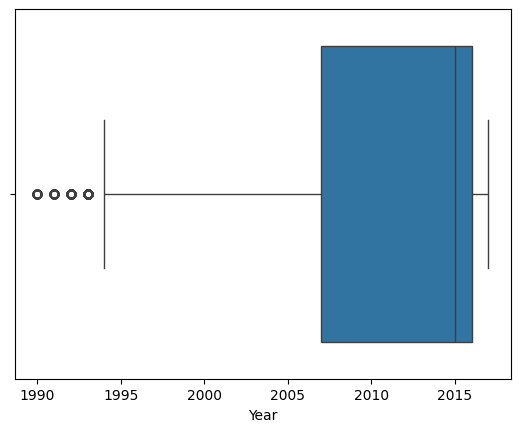

HP


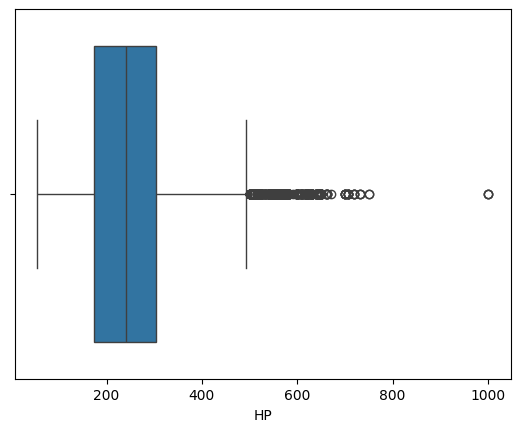

Cylinders


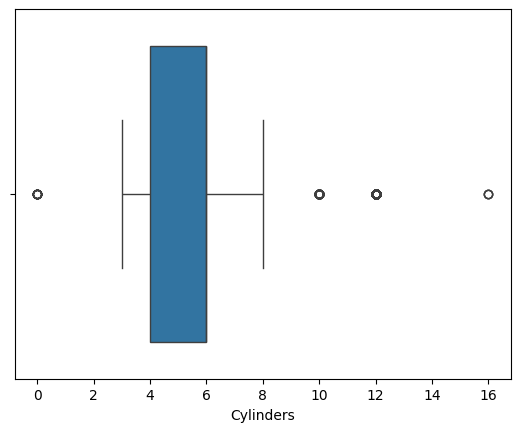

MPG-H


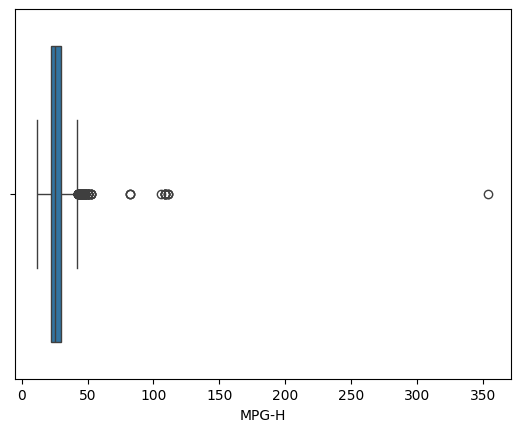

MPG-C


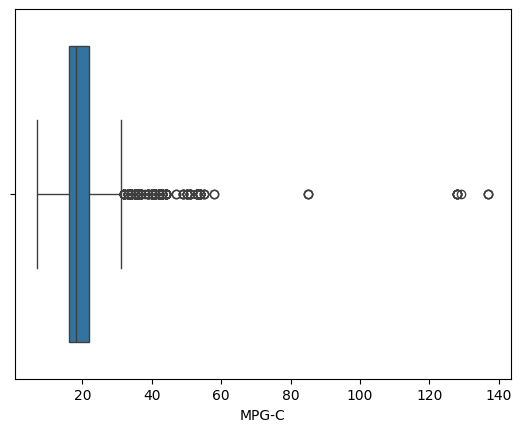

Price


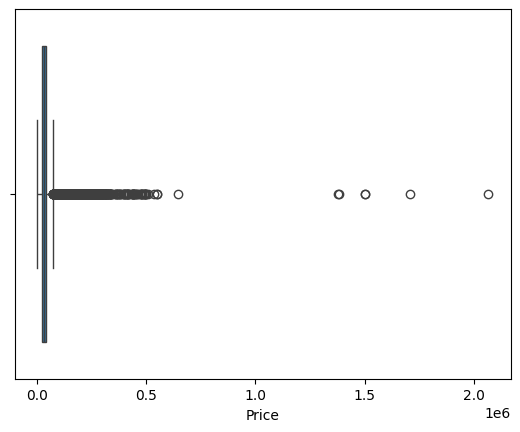

In [85]:
cols = df.columns
print(df.dtypes)
print(df.head())
for col in cols:
    if(df[col].dtype in ["int64", "float64"]):
        print(col)
        sns.boxplot(x = df[col])
        plt.show()

#### Now removing the outliers

In [86]:
# finding Inter Quartile range for each numeric column

numeric_df = df.select_dtypes(include=['int64', 'float64'])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        21330.0
dtype: float64


In [87]:
outlier_condition = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR)))
outliers = df[outlier_condition.any(axis=1)]
df = df[~outlier_condition.any(axis=1)]
print(df.shape)

(9189, 10)


### i) Plotting features

#### Histogram

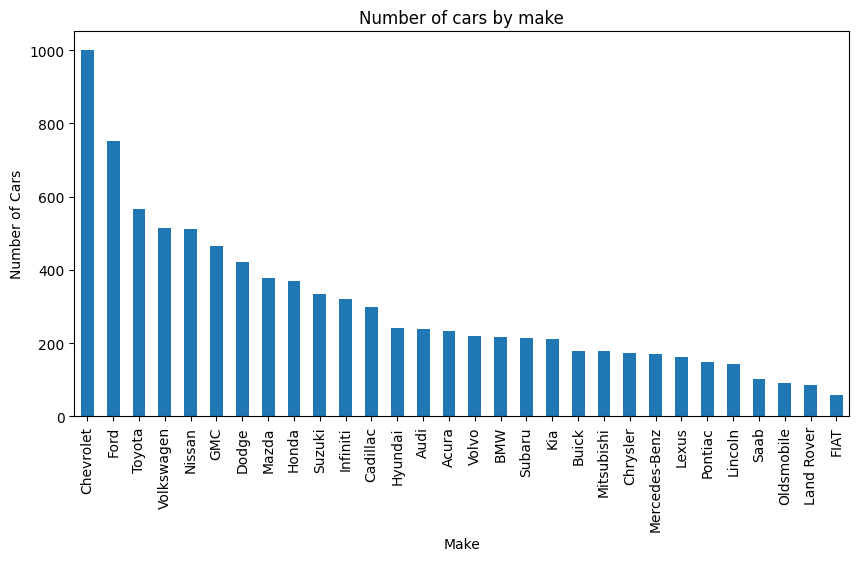

In [88]:
# Histogram

df["Make"].value_counts().nlargest(30).plot(kind='bar', figsize=(10,5))
	# picking top 30 largest value counts for the bar 
plt.title("Number of cars by make")
plt.xlabel("Make")
plt.ylabel("Number of Cars")
plt.show()



In [89]:
df["Make"].value_counts().nlargest(10)
	# shows each types count under make column 
    # when nlargest(10) added, only top 10 values will be shown 

Make
Chevrolet     1001
Ford           753
Toyota         567
Volkswagen     515
Nissan         512
GMC            466
Dodge          423
Mazda          378
Honda          371
Suzuki         335
Name: count, dtype: int64

#### HeatMaps

,Year,HP,Cylinders,MPG-H,MPG-C,Price
Year,1.000000,0.326779,-0.133918,0.378482,0.338146,0.593028
HP,0.326779,1.000000,0.715247,-0.443879,-0.544628,0.739008
Cylinders,-0.133918,0.715247,1.000000,-0.703880,-0.755560,0.353981
MPG-H,0.378482,-0.443879,-0.703880,1.000000,0.939141,-0.106330
MPG-C,0.338146,-0.544628,-0.755560,0.939141,1.000000,-0.180527
Price,0.593028,0.739008,0.353981,-0.106330,-0.180527,1.000000


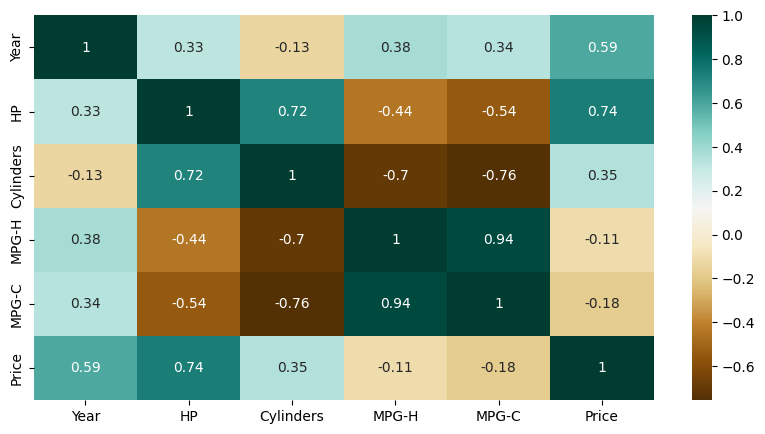

In [90]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,5))
c = numeric_df.corr()
sns.heatmap(c,cmap="BrBG", annot=True)
c

#### Scatterplot

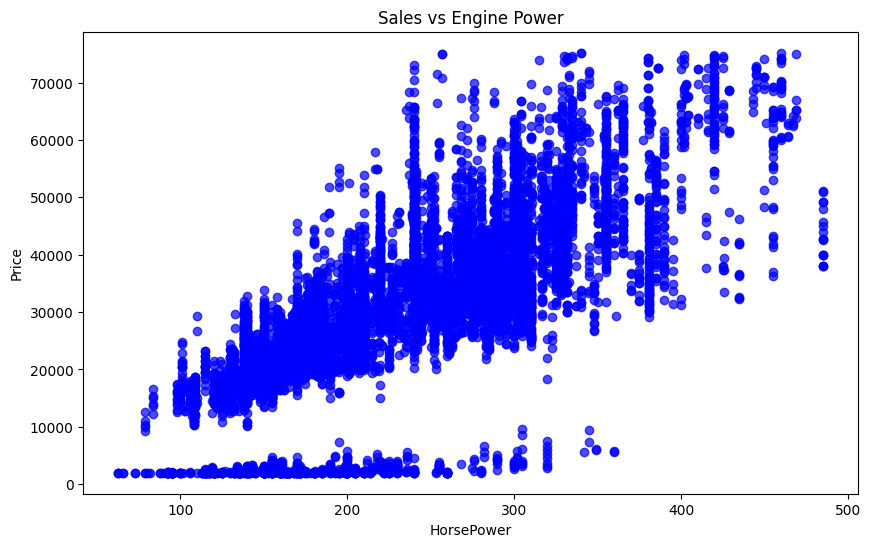

In [91]:
plt.figure(figsize=(10,6))
plt.scatter(x=df['HP'], y=df['Price'], color='blue', alpha=0.7)

plt.title("Sales vs Engine Power")
plt.xlabel("HorsePower")
plt.ylabel("Price")
plt.show()